<a href="https://colab.research.google.com/github/Venchislav/Neural-Networks/blob/main/GoldPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import numpy as np

In [62]:
df = pd.read_csv('/content/sample_data/FINAL_USO.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [63]:
df.dtypes

Date              object
Open             float64
High             float64
Low              float64
Close            float64
                  ...   
USO_High         float64
USO_Low          float64
USO_Close        float64
USO_Adj Close    float64
USO_Volume         int64
Length: 81, dtype: object

In [64]:
df['Date'] = pd.to_datetime(df['Date'])

In [65]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df = df.drop('Date', axis=1)

In [66]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume,Year,Month,Day
0,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,...,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700,2011,12,15
1,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,...,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800,2011,12,16
2,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,...,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200,2011,12,19
3,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,...,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600,2011,12,20
4,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,124.169998,...,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000,2011,12,21


In [67]:
X=df.drop(['Adj Close'],axis=1)
X=X.drop(['Close'],axis=1)

In [68]:
y = df['Close']

In [69]:
from sklearn.preprocessing import MinMaxScaler

In [70]:
ms = MinMaxScaler((0, 1))
X = ms.fit_transform(X)

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [73]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

In [74]:
X.shape

(1718, 81)

In [75]:
model = keras.Sequential([
    layers.Dense(81, activation='relu', input_shape=[X.shape[1]]),
    layers.Dense(81, activation='relu'),
    layers.Dense(40, activation='relu'),
    layers.Dense(1, activation='relu')
]
)

In [76]:
esc = EarlyStopping(min_delta=0.0001,
                    patience=10,
                    restore_best_weights=True)

In [77]:
model.compile(
    optimizer='adam',
    loss='mae'
)

In [78]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=500,
    callbacks=[esc],
    verbose=0
)

In [79]:
hist_df = pd.DataFrame(history.history)
hist_df.head()

,loss,val_loss
0,116.195503,79.581215
1,27.445576,12.755342
2,11.570088,8.953526
3,7.774168,6.401409
4,5.750955,5.352772


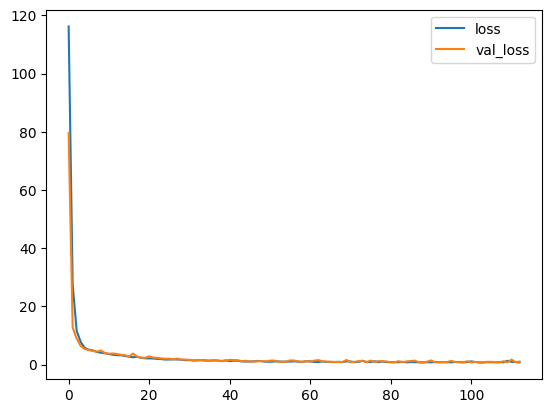

In [80]:
hist_df.loc[:, ['loss', 'val_loss']].plot();

In [81]:
pred = model.predict(X_test)

14/14 [==============================] - 0s 2ms/step


In [82]:
pred

array([[125.4545  ],
       [115.311775],
       [127.974144],
       [155.79475 ],
       [114.73054 ],
       [118.90256 ],
       [151.29773 ],
       [101.04366 ],
       [168.11    ],
       [126.11865 ],
       [111.92507 ],
       [115.123886],
       [123.67148 ],
       [116.53928 ],
       [120.616066],
       [101.65846 ],
       [117.16707 ],
       [126.47643 ],
       [124.581665],
       [120.1105  ],
       [167.52489 ],
       [133.9045  ],
       [161.76889 ],
       [116.8651  ],
       [160.23453 ],
       [120.87709 ],
       [125.05967 ],
       [112.26354 ],
       [117.60025 ],
       [113.0176  ],
       [104.08547 ],
       [118.42393 ],
       [160.80486 ],
       [121.60003 ],
       [111.30101 ],
       [117.341866],
       [152.67253 ],
       [127.57997 ],
       [128.35594 ],
       [150.09636 ],
       [126.35643 ],
       [137.83653 ],
       [119.02023 ],
       [115.61274 ],
       [120.67386 ],
       [159.98564 ],
       [127.19544 ],
       [126.4

In [83]:
y_test

1145    126.750000
707     115.779999
605     128.539993
151     155.669998
1619    114.589996
           ...    
928     111.680000
500     120.989998
175     160.589996
47      171.699997
559     126.220001
Name: Close, Length: 430, dtype: float64

In [84]:
hist_df['val_loss'].min()

0.7579643130302429